In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

file_path = "/content/ML_churn_Analysis.xlsx"
sheet_name = 'churn_data'
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[793  54]
 [151 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       847
           1       0.79      0.57      0.67       355

    accuracy                           0.83      1202
   macro avg       0.82      0.76      0.78      1202
weighted avg       0.83      0.83      0.82      1202



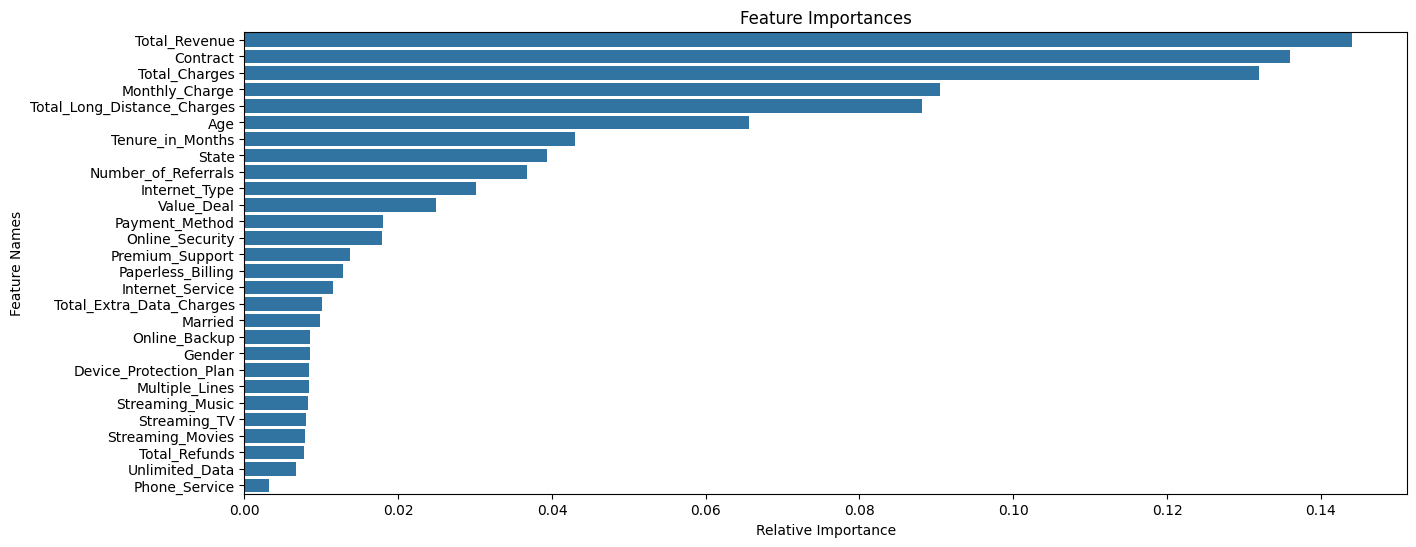

In [ ]:
y_pred = rf_model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [ ]:
file_path = "/content/ML_churn_Analysis.xlsx"

sheet_name = 'join_data'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)


original_data = new_data.copy()

customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

new_predictions = rf_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

original_data.to_csv("Output.csv", index=False)